In [1]:
print("Hello World")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from datetime import datetime

may = pd.read_csv("data/YargaitGH-Ashley-Humid-Solar-Data-May.csv")

may["MeasureDate"] = pd.to_datetime(may["MeasureDate"], format="%m/%d/%Y %H:%M")

may = may.set_index('MeasureDate')
# Measure Date
# df = df.loc[(df["sensorTime"] >= '2023-05-02 00:00:00') & (df["sensorTime"] <= '2023-05-03 00:00:00')]
humid = may[[ 'RH1', 'RH2', 'Temp1', 'Temp2' ]]
# humid = may[[ 'Temp1', 'Temp2' ]]
# humid.plot(figsize=(12,6))
# plt.xlabel('цаг хугацаа')
# plt.ylabel('харьцангүй чийгшил')
# plt.show()

Hello World


In [2]:
# The function to find the mass of water in the HUMID 
# ABSOLUTE humidity
def waterMassInAir(temperature):
    # water mass relative with temperature is m(T) = 5.44*e^0.0539, where T is temperature
    e = 2.71828182
    mass = 5.44 * e**(0.0539*temperature)
    return mass

In [3]:
waterMassInAir(4)

6.748896838514675

In [4]:
# ==== Агааржуулалтын хоолойгоор дамжиж хөрсөнд шингэсэн дулааны энергийг тооцох функц ====
# T_input = агаарын хоолойгоор орох үеийн дулаан
# T_output = агаарын хоолой хөрсөөр дамжин гарч ирэх үеийн дулаан
# speed = m3/s агаарын урсгалын хурд

def airFlowEnergy(T_input, T_output, speedVolume):
    # Heat energy of air calculation
    C_air = 1005 # [kj/(kg*C)]
    D_air = 1.2 # Density of air [kg/m3]
    m = speedVolume * D_air # mass of air
    Q_air = m * C_air * (T_input - T_output)
    # Humid heat calculation, Heat Capacity Humid  [kJ/kg*C]
    C_humid = 1.8212
    # Intake Heat energy of humid calculation Q = m * c * (T - 0)
    Q_humid_in = waterMassInAir(T_input) * C_humid * T_input
    # Outlet Heat energy of humid calculation
    Q_humid_out = waterMassInAir(T_output) * C_humid * T_output
    # HUMID HEAT energy
    Q_humid = Q_humid_in - Q_humid_out
    # Overall flow heat energy
    Q_flow = Q_air + Q_humid
    # # Q => E=kWh
    # Electric_energy = Q_flow/3600
    # print("Electric energy = [W*s] | if you need kWh then divide by 1000", Electric_energy)
    # E=kWh => хэдэн төгрөг ₮?
    return Q_flow

In [ ]:
# Агааржуулалтын хоолойн хурд 950м3/цаг
speedVolume = 950/3600 # 1h = 3600s
airFlowEnergy(T_input, T_output, speedVolume)

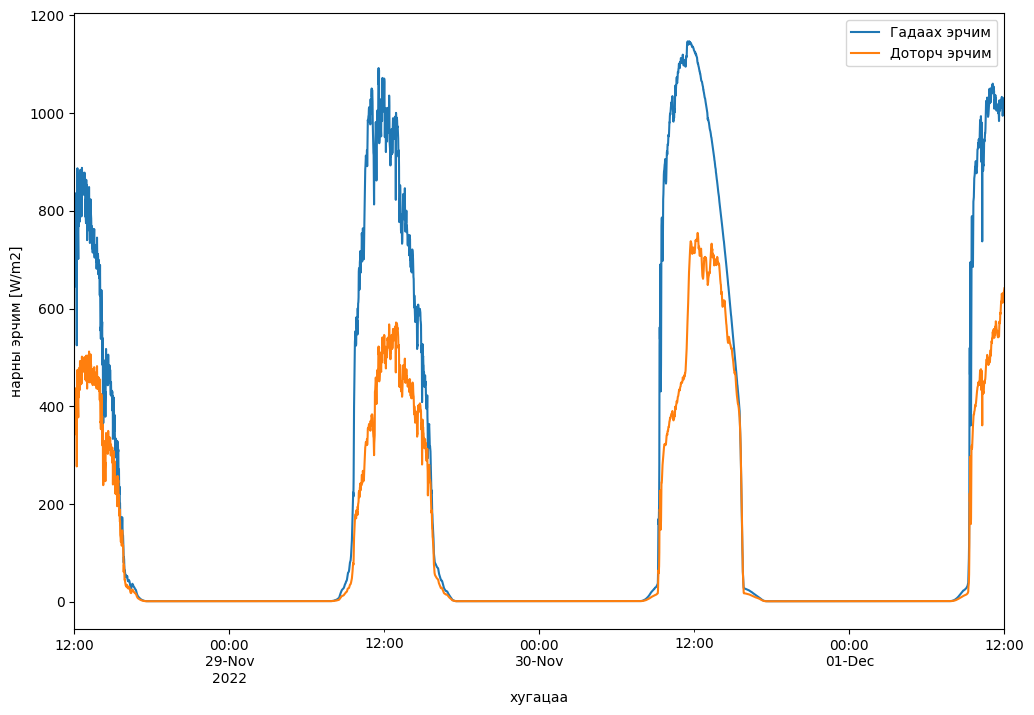

SUN inside max 754.728
SUN inside mean 121.52602048137005
SUN inside min 0.82304


In [5]:
# November
nov8 = pd.read_csv("data/YargaitGH-Uwall-20221206.csv")
nov8["MeasureTime"] = pd.to_datetime(nov8["MeasureTime"], format="%m/%d/%Y %H:%M")
nov8 = nov8.set_index('MeasureTime')
# nov8 = nov8.query("MeasureTime <= '2022-11-10 12:00:00' and MeasureTime >= '2022-11-08 12:00:00'")
nov8 = nov8.query("MeasureTime <= '2022-12-01 12:00:00' and MeasureTime >= '2022-11-28 12:00:00'")
data = nov8[[ 'Radiation-outside', 'Radiation-inside']]
data.plot(subplots=False, figsize=(12,8))
plt.xlabel('хугацаа')
plt.ylabel('нарны эрчим [W/m2]')
plt.legend(('Гадаах эрчим','Доторч эрчим'))
# plt.legend(('Гадаах хэм','Дотор хэм','Орох хэм','Гарах хэм','Өнгөн хөрсний хэм','2м гүн дэх хэм'),loc="upper left")
plt.show()
print("SUN inside max", data['Radiation-inside'].max())
print("SUN inside mean", data['Radiation-inside'].mean())
print("SUN inside min", data['Radiation-inside'].min())

In [6]:
# Stored Energy = 180м3 хөрсийг T_start -> T_end болтол халаахад ямар хэмжээний энерги хэрэгтэй болохыг тооцолно
def storedEnergy(T_start, T_end):
    # Volume=180m3, Density=2200kg/m3, C_heatCapacity = 712 J/(kg*C)
    volume = 180
    density = 2200
    C = 712  # C_heatCapacity = 712 J/(kg*C)
    mass = volume * density
    print("mass = ", mass)
    Q = mass * C * (T_start - T_end)
    E = (Q/1000)/3600  # Energy in kWh
    print("Q = ", Q)
    print("E = ", E, "kWh")
    return Q

In [341]:
# Joule
storedEnergy(5, 20)

mass =  396000
Q =  -4229280000
E =  -1174.8 kWh


-4229280000

In [ ]:
# Агааржуулалтын хоолойн хурд 950м3/цаг
speedVolume = 950/3600 # 1h = 3600s
heatFlow = airFlowEnergy(data['T_fan_input'], data['Front_fan_pipe'], speedVolume)
# heatFlow.plot()
# plt.show()
heatFlow.to_csv('./data/heat_energy_flow.csv')

#  # =====================================
# # Separate positive and negative values
# positive_values = heatFlow[heatFlow['HeatFlow'] >= 0]
# negative_values = heatFlow[heatFlow['HeatFlow'] <= 0]

# # Create the bar chart
# plt.figure(figsize=(10, 6))
# plt.bar(negative_values['MeasureTime'], negative_values['HeatFlow'], color='blue', alpha=0.8)
# plt.bar(positive_values['MeasureTime'], positive_values['HeatFlow'], color='orange', alpha=0.8)

# # Customize the plot
# plt.title('Bar Chart for HeatFlow')
# plt.xlabel('MeasureTime')
# plt.ylabel('HeatFlow')
# plt.legend(['Negative', 'Positive'])
# plt.grid(True)

# # Display the chart
# plt.show()

# # ===================================


storedEnergy = heatFlow[heatFlow >=0]
storedEnergy.plot()
plt.show()
print('overall stored energy=', storedEnergy.sum())

usedEnergy = heatFlow[heatFlow <= 0]
usedEnergy.plot()
plt.show()
print('overall used energy=', usedEnergy.sum())

# Q => E=kWh
# Stored energy if it was electric energy instead
stored_Electric_energy = (storedEnergy.sum())/3600
cost_stored_energy = stored_Electric_energy * 100 # 1kWh = 100₮
print("STORED Electric energy = [W*s] | if you need kWh then divide by 1000", stored_Electric_energy)
print("stored energy cost", cost_stored_energy)
# Equivalent energy if used electric energy instead
used_Electric_energy = (usedEnergy.sum())/3600
cost_used_energy = used_Electric_energy * 100 # 1kWh = 100₮
print("USED Electric energy = [W*s] | if you need kWh then divide by 1000", used_Electric_energy)
print("used energy cost = ", cost_used_energy)
# ==== equivalent COST of used HEAT ====
cost = cost_used_energy * 200
print("COST Electric energy = [W*s] ", cost)

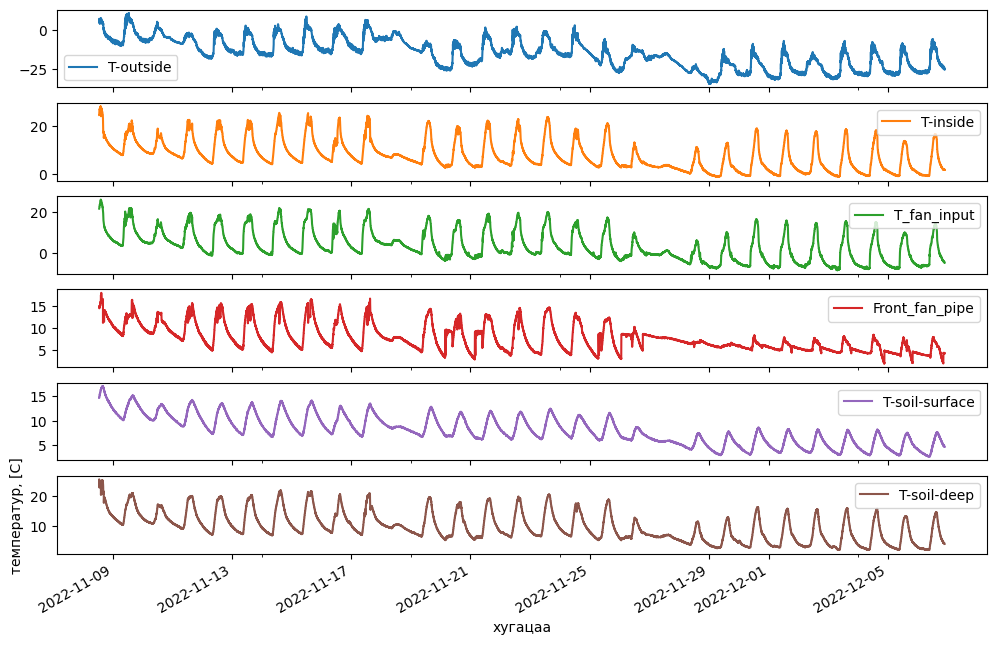

Outside coldest temp= -34.5
Soil 2m deep warmest temp 25.3
Soil 2m deep mean temp 9.843964144889911
Soil 2m deep minimm temp 2.2


In [116]:
# Early December data, боломжийн дулаан хөрстэй, маш хүйтэн өдөр

nov8 = pd.read_csv("data/YargaitGH-Uwall-20221206.csv")
nov8["MeasureTime"] = pd.to_datetime(nov8["MeasureTime"], format="%m/%d/%Y %H:%M")
nov8 = nov8.set_index('MeasureTime')
# nov8 = nov8.query("MeasureTime <= '2022-12-15 12:00:00' and MeasureTime >= '2022-11-28 12:00:00'")
data = nov8[[ 'T-outside', 'T-inside', 'T_fan_input', 'Front_fan_pipe','T-soil-surface', 'T-soil-deep']]
data.plot(subplots=True, figsize=(12,8))
plt.xlabel('хугацаа')
plt.ylabel('температур, [C]')
# plt.legend(('Гадаах хэм','Дотор хэм','Орох хэм','Гарах хэм','Өнгөн хөрсний хэм','2м гүн дэх хэм'),loc="upper left")
plt.show()
print("Outside coldest temp=", data['T-outside'].min())
print("Soil 2m deep warmest temp", data['T-soil-deep'].max())
print("Soil 2m deep mean temp", data['T-soil-deep'].mean())
print("Soil 2m deep minimm temp", data['T-soil-deep'].min())

In [11]:
# DATA combined for long period of time
nov8 = pd.read_csv("data/YargaitGH-Uwall-20221206.csv")
nov8["MeasureTime"] = pd.to_datetime(nov8["MeasureTime"], format="%m/%d/%Y %H:%M")

dec6Jan = pd.read_csv("data/Yargait-20221206-20230101.csv")
dec6Jan["MeasureTime"] = pd.to_datetime(dec6Jan["MeasureTime"], format="%m/%d/%Y %H:%M")

jan1 = pd.read_csv("data/Gdoc-Weekly-Greenhouse - Jan-1-7.csv")
jan1["MeasureTime"] = pd.to_datetime(jan1["MeasureTime"], format="mixed")

jan8 = pd.read_csv("data/Gdoc-Weekly-Greenhouse - Jan-8-14.csv")
jan8["MeasureTime"] = pd.to_datetime(jan8["MeasureTime"], format="%Y-%m-%d %H:%M")
# df = df.iloc[df['MeasureTime'] > '2023-05-01 12:00:00']
# jan8 = jan8.loc[(jan8["MeasureTime"] >= '2023-01-09 00:00') & (df["MeasureTime"] <= '2023-01-12 00:00')]

jan15 = pd.read_csv("data/Gdoc-Weekly-Greenhouse - Jan-15-21.csv")
jan15["MeasureTime"] = pd.to_datetime(jan15["MeasureTime"], format="%Y-%m-%d %H:%M")

jan22 = pd.read_csv("data/Gdoc-Weekly-Greenhouse - Jan-22-28.csv")
jan22["MeasureTime"] = pd.to_datetime(jan22["MeasureTime"], format="%Y-%m-%d %H:%M")

jan29 = pd.read_csv("data/Gdoc-Weekly-Greenhouse - Jan-29-Feb-4.csv")
jan29["MeasureTime"] = pd.to_datetime(jan29["MeasureTime"], format="%Y-%m-%d %H:%M")

feb5 = pd.read_csv("data/Gdoc-Weekly-Greenhouse - Feb-5-11.csv")
feb5["MeasureTime"] = pd.to_datetime(feb5["MeasureTime"], format="%Y-%m-%d %H:%M")

feb12 = pd.read_csv("data/Gdoc-Weekly-Greenhouse - Feb-12-18.csv")
feb12["MeasureTime"] = pd.to_datetime(feb12["MeasureTime"], format="%Y-%m-%d %H:%M")

feb19 = pd.read_csv("data/Gdoc-Weekly-Greenhouse - Feb-19-25.csv")
feb19["MeasureTime"] = pd.to_datetime(feb19["MeasureTime"], format="%Y-%m-%d %H:%M")

feb26 = pd.read_csv("data/Gdoc-Weekly-Greenhouse - Feb-26-Mar-4.csv")
feb26["MeasureTime"] = pd.to_datetime(feb26["MeasureTime"], format="%Y-%m-%d %H:%M")

mar5 = pd.read_csv("data/Gdoc-Weekly-Greenhouse - Mar-5-11.csv")
mar5["MeasureTime"] = pd.to_datetime(mar5["MeasureTime"], format="%Y-%m-%d %H:%M")

mar12 = pd.read_csv("data/Gdoc-Weekly-Greenhouse - Mar-12-16.csv")
mar12["MeasureTime"] = pd.to_datetime(mar5["MeasureTime"], format="%Y-%m-%d %H:%M")

# April data

mar19Apr = pd.read_csv("data/YargaitGH-2023-03-19-04-15.csv")
mar19Apr["MeasureTime"] = pd.to_datetime(mar19Apr["MeasureTime"], format="%m/%d/%Y %H:%M")

# April-May data

apr30 = pd.read_csv("data/YargaitGH-2023-04-30-05-06.csv")
apr30["MeasureTime"] = pd.to_datetime(apr30["MeasureTime"], format="%m/%d/%Y %H:%M")
# data evderhii bsan tul hursnii temp bolon air intake temptei dundajlav
apr30['T-inside'] = (apr30['T_fan_input'] + apr30['T-soil-surface'])/2

together = [nov8, dec6Jan, jan1, jan8, jan15, jan22, jan29, feb5, feb12, feb19, feb26, mar5, mar12, mar19Apr, apr30 ]
allPeriod = pd.concat(together)
allPeriod = allPeriod.set_index('MeasureTime')
# allPeriod.head(3)
allPeriod

,T-outside,T-inside,T-soil-surface,T_fan_input,Front_fan_pipe,T-soil-deep,HF Wall [W/m2],HF Glass [W/m2],Radiation-outside,Radiation-inside,Tdiff,Fan-1,Fan-2,SunRay/100,Temperature difference,Conduction HeatLoss,Solar Power,AirFlow_temp_diff,absorbed_energy,released_energy
MeasureTime,,,,,,,,,,,,,,,,,,,,
2022-11-08 13:07:00,6.6,24.50,14.6,21.6,14.8,24.1,-7.92242,14.9511,980.233,552.260,17.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-08 13:08:00,7.5,24.50,14.6,21.7,14.8,25.3,-6.99037,19.4017,989.162,558.124,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-08 13:09:00,7.1,25.00,14.7,21.8,14.7,23.5,-6.65750,19.3321,981.284,555.140,17.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-08 13:10:00,6.4,25.30,14.7,21.8,14.6,23.1,-6.79065,21.0706,982.124,559.153,18.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-08 13:11:00,6.8,25.50,14.7,21.8,14.6,22.8,-3.19560,20.5143,969.414,554.420,18.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-06 16:57:00,13.3,19.15,18.8,19.5,18.2,14.5,NaN,NaN,357.770,188.890,NaN,5.13,22.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-06 16:58:00,13.0,19.15,18.8,19.5,18.2,14.5,NaN,NaN,349.890,189.300,NaN,3.26,15.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-06 16:59:00,12.6,19.05,18.8,19.3,18.1,14.6,NaN,NaN,340.440,178.390,NaN,3.00,13.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Outside coldest temp= -38.9
Soil 2m deep warmest temp 25.3
Soil 2m deep mean temp 4.922163690246409
Soil 2m deep minimm temp 0.8


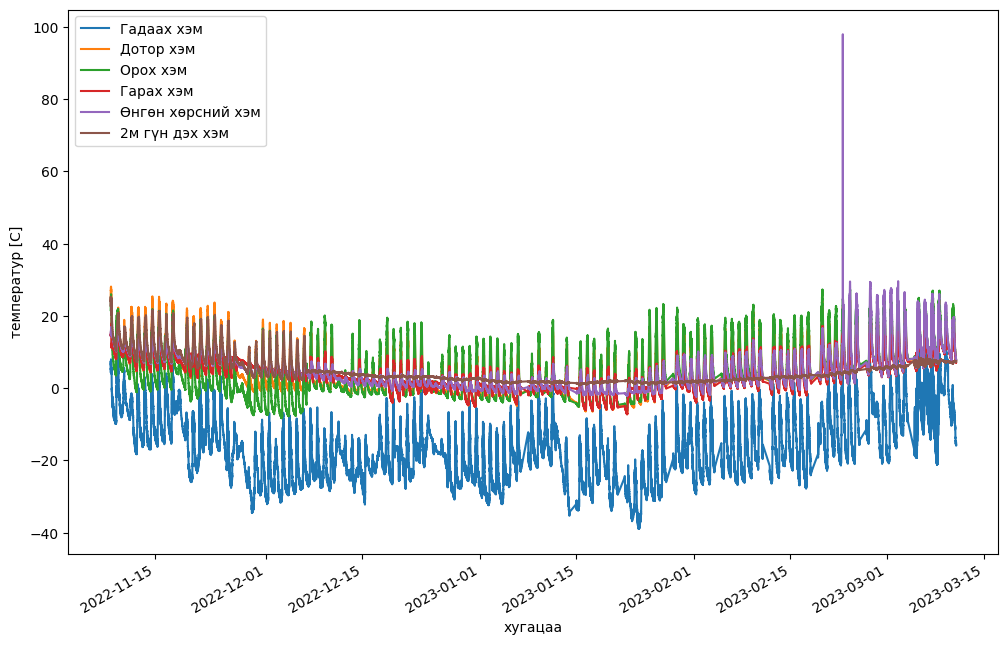

In [38]:
data = allPeriod.query("MeasureTime <= '2023-03-15 12:00:00' and MeasureTime >= '2022-11-08 12:00:00'")
# Only soil-deep and outside temperature
# data = data[['T-outside', 'T-soil-deep']]
# data.plot(figsize=(12,8))
# plt.legend(('Гадаах хэм','2м гүний хэм'))

# all
data = data[[ 'T-outside', 'T-inside', 'T_fan_input', 'Front_fan_pipe','T-soil-surface', 'T-soil-deep']]
data.plot(figsize=(12,8))
plt.legend(('Гадаах хэм','Дотор хэм','Орох хэм','Гарах хэм','Өнгөн хөрсний хэм','2м гүн дэх хэм'),loc="upper left")

print("Outside coldest temp=", data['T-outside'].min())
print("Soil 2m deep warmest temp", data['T-soil-deep'].max())
print("Soil 2m deep mean temp", data['T-soil-deep'].mean())
print("Soil 2m deep minimm temp", data['T-soil-deep'].min())

plt.xlabel('хугацаа')
plt.ylabel('температур [C]')
plt.show()

In [37]:
import streamlit as st
import plotly.express as px

@st.cache_data
def getNovember_data():
    nov8 = pd.read_csv("data/YargaitGH-Uwall-20221206.csv")
    nov8["MeasureTime"] = pd.to_datetime(nov8["MeasureTime"], format="%m/%d/%Y %H:%M")
    nov8 = nov8.set_index('MeasureTime')
    return nov8

novData = getNovember_data()

period = st.slider('select MeasureTime', 2022-11-9, 2023-4-15)

2023-05-30 18:51:08.564 No runtime found, using MemoryCacheStorageManager


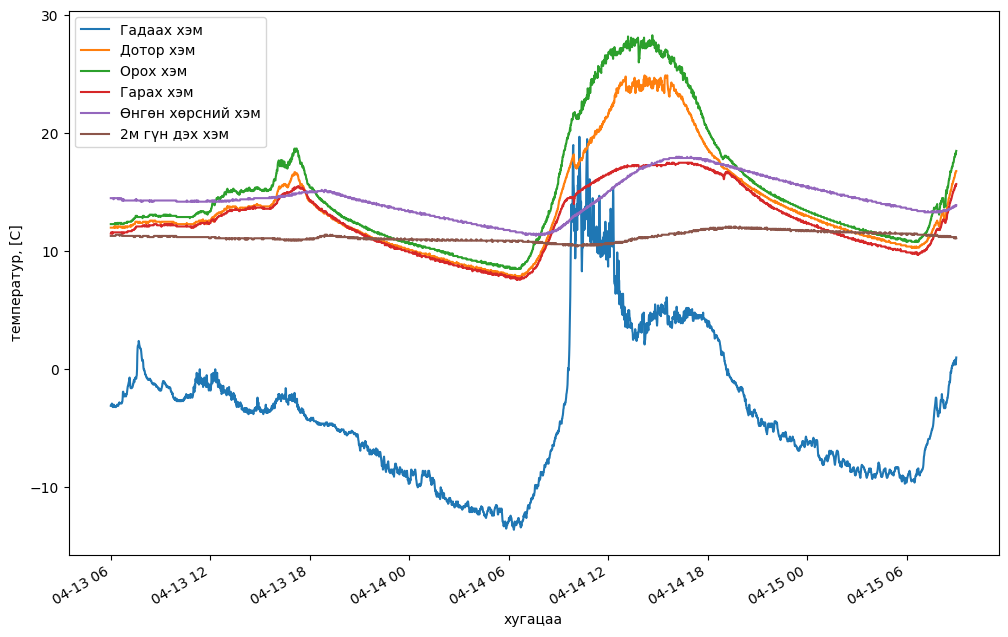

Outside coldest temp= -13.6
Outside coldest temp= -13.6
Outside warmest temp= 19.7
Inside warmest temp= 24.9
Inside coolest temp= 7.8
Soil 2m deep warmest temp 12.1
Soil 2m deep mean temp 11.232450980392155
Soil 2m deep minimm temp 10.4


In [95]:
# Mar-April
data = mar19Apr
data = data.set_index('MeasureTime')
data = data.query("MeasureTime <= '2023-04-15 09:00:00' and MeasureTime >= '2023-04-13 06:00:00'")

data = data[[ 'T-outside', 'T-inside', 'T_fan_input', 'Front_fan_pipe','T-soil-surface', 'T-soil-deep']]
data.plot(subplots=False,figsize=(12,8))
plt.xlabel('хугацаа')
plt.ylabel('температур, [C]')
plt.legend(('Гадаах хэм','Дотор хэм','Орох хэм','Гарах хэм','Өнгөн хөрсний хэм','2м гүн дэх хэм'),loc="upper left")
plt.show()
print("Outside coldest temp=", data['T-outside'].min())

print("Outside coldest temp=", data['T-outside'].min())
print("Outside warmest temp=", data['T-outside'].max())
print("Inside warmest temp=", data['T-inside'].max())
print("Inside coolest temp=", data['T-inside'].min())
print("Soil 2m deep warmest temp", data['T-soil-deep'].max())
print("Soil 2m deep mean temp", data['T-soil-deep'].mean())
print("Soil 2m deep minimm temp", data['T-soil-deep'].min())

In [ ]:
# Detect outliers
energy['T-inside'].hist()

In [109]:
# FIXING OUTLIERS

# energy['T-inside'] = np.where(energy['T-inside'] < -60, -60,energy['T-inside'])
# energy['T-inside'] = np.where(energy['T-inside'] > 60, 60, energy['T-inside'])
# print(energy['T-inside'].skew())

# energy = allPeriod[['MeasureTime', 'T-outside', 'T-inside','T-soil-surface', 'T-soil-deep','Radiation-outside', 'Radiation-inside']].copy()

# T-inside
index = energy[(energy['T-inside'] >= 60)|(energy['T-inside']<= -60)].index
energy.drop(index, inplace=True)

# T-soil-surface
index = energy[(energy['T-soil-surface'] >= 60)|(energy['T-soil-surface']<= -60)].index
energy.drop(index, inplace=True)

energy['T-soil-surface'].describe()

count    161983.000000
mean          8.057018
std           7.075647
min          -2.400000
25%           2.100000
50%           6.600000
75%          14.400000
max          29.600000
Name: T-soil-surface, dtype: float64

C:\Users\berde\AppData\Local\Temp\ipykernel_4060\2885955384.py:30: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



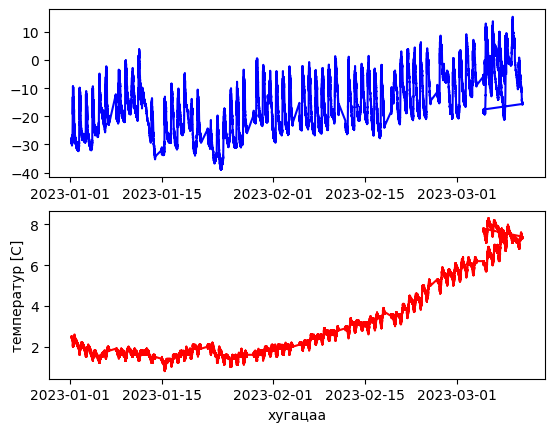

In [58]:
# December-January data, боломжийн дулаан хөрстэй, маш хүйтэн өдөр
data = allPeriod[[ 'T-outside', 'T-inside', 'T-soil-deep']].copy()
# data = data.set_index('MeasureTime')
# energy.plot()

# data = dec6Jan
data = data.query("MeasureTime <= '2023-03-15 18:00:00' and MeasureTime >= '2023-01-01 06:00:00'")
# ===== subplots =========
# plt.figure()
# plt.subplot(2,1,1)
# plt.plot(data['T-outside'])
# plt.ylabel('температур [C]')
# plt.xlabel('хугацаа')
# plt.title('Гадаа хэм')

# plt.figure()
# plt.subplot(2,1,2)
# plt.plot(data['T-soil-deep'])
# plt.ylabel('температур [C]')
# plt.xlabel('хугацаа')
# plt.title('2м гүний хэм')
# =================
fig, ax = plt.subplots(2,1)
ax[0].plot(data['T-outside'], color='b')
plt.ylabel('температур [C]')
plt.xlabel('хугацаа')
ax[1].plot(data['T-soil-deep'], color='r')
plt.ylabel('температур [C]')
plt.xlabel('хугацаа')
fig.show()



# ======================
# data.plot(subplots=False,figsize=(12,8))
# plt.xlabel('хугацаа')
# plt.ylabel('температур, [C]')
# # plt.legend(('Гадаах хэм','Дотор хэм','Орох хэм','Гарах хэм','Өнгөн хөрсний хэм','2м гүн дэх хэм'),loc="upper left")
# plt.show()
# print("Outside coldest temp=", data['T-outside'].min())

In [39]:
# Graphics chart

# energy = allPeriod[['MeasureTime', 'T-outside', 'T-inside','T-soil-surface', 'T-soil-deep','Radiation-outside', 'Radiation-inside']].copy()
# energy = energy.set_index('MeasureTime')
# energy.plot()
plt.figure()
energy.plot(subplots=True, figsize=(12, 6)); plt.legend(loc='best')
plt.xlabel('хугацаа')
plt.ylabel('температур, [C]')
plt.show()

NameError: name 'energy' is not defined

<Figure size 640x480 with 0 Axes>

In [136]:
# One day 
# nov8 = nov8.iloc[df['MeasureTime'] > '2022-11-10 12:00:00']
jan8 = jan8.loc[(jan8["MeasureTime"] >= '2023-01-09 00:00') & (jan8["MeasureTime"] <= '2023-01-12 00:00')]
jan8 = jan8.set_index('MeasureTime')
jan8.plot()
plt.show()
# nov8
# jan8

KeyError: 'MeasureTime'

In [113]:
# THERMAL BALANCE
# new = old[['A', 'C', 'D']].copy()
# Q = a*u*(t1-t2)
def supplyEnergy(a, tempInner, u):
    energy['thermalComfort'] = tempInner
    energy['requiredHeat'] = a * u * (tempInner - energy['T-outside'])
    energyBalance = energy.drop(columns=['Radiation-inside', 'Radiation-outside'])
    requiredHeat = energyBalance['requiredHeat'].sum()
    energyBalance.plot()
    plt.show()
    return requiredHeat



In [9]:
# DROP radiation
# widgets.interact(function, a=(min, max, interval))
widgets.interact(supplyEnergy, a=(1,100,0.5), tempInner=(1,30,1), u=(0.2, 10, 0.1) )
# supplyEnergy(50, 20, 5)

interactive(children=(FloatSlider(value=50.0, description='a', min=1.0, step=0.5), IntSlider(value=15, descrip…

<function __main__.supplyEnergy(a, tempInner, u)>

In [ ]:
drySoilDensity = 1220
wetSoilDensity = 1760
drySoilHcap = 800
wetSoilHcap = 1480
soilDensity = (drySoilDensity + wetSoilDensity)/2
soilHcap = (drySoilHcap + wetSoilHcap)/2

In [28]:
def changeInnerTemp(a, innerTempGoal, u):
    energy['innerTempGoal'] = innerTempGoal
    energy['Radiation-inside'] = energy['Radiation-inside'] / 100
    energy['Radiation-outside'] = energy['Radiation-outside'] / 100
    energy['neededHeat'] = a * u * (innerTempGoal - energy['T-outside'])
    # energy.drop(columns=['Radiation-inside', 'Radiation-outside'])
    energy.plot()
    plt.show()

In [29]:
# widgets.interact(function, a=(min, max, interval))
widgets.interact(changeInnerTemp, a=(1,100,0.5), innerTempGoal=(1
                                                                ,20000,2500), u=(0.2, 10, 0.1) )

ValueError: cannot find widget or abbreviation for argument: 'innerTempGoal'

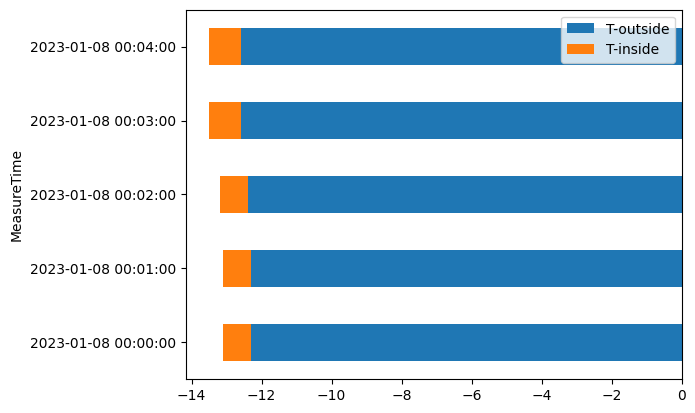

In [25]:
# ENERGY BALANCE
energy.head(5).plot(kind='barh', stacked=True);